In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
california = fetch_california_housing()

In [4]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Text(0, 0.5, 'Price in $1000s')

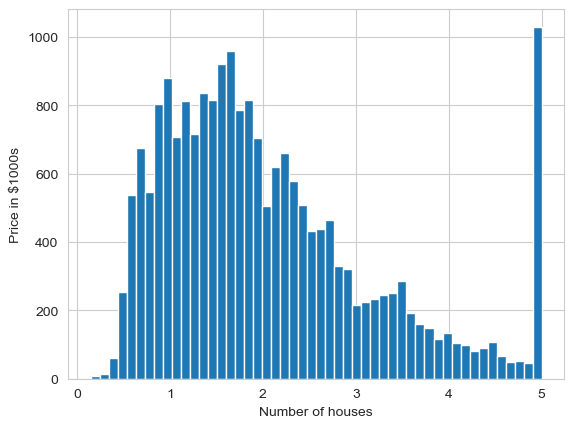

In [5]:
plt.hist(california.target,bins=50)

plt.xlabel('Number of houses')
plt.ylabel('Price in $1000s')

In [6]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

Text(0, 0.5, 'Price in $1000s')

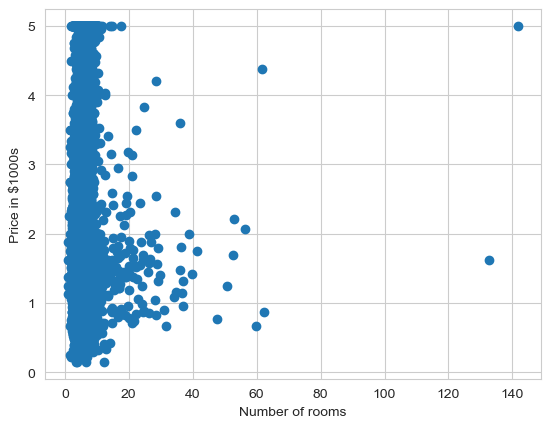

In [7]:
plt.scatter(california.data[:,2],california.target)

plt.xlabel('Number of rooms')
plt.ylabel('Price in $1000s')

In [8]:
california_df = DataFrame(california.data)
california_df.columns= california.feature_names
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
california_df['Price'] = california.target
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
california_df['AveRooms'].max()

141.9090909090909

In [11]:
california_df['Price'].max()

5.00001

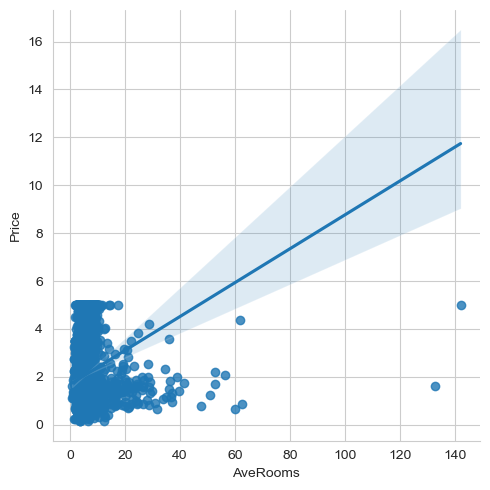

In [12]:
sns.lmplot(data=california_df,x='AveRooms',y='Price')

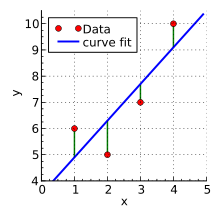

In [13]:
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png'
Image(url)

In [14]:
# Set up X as median room values
x = california_df.AveRooms

# Set up Y as the target price of the houses.
y = california_df.Price

In [15]:
A = np.vstack([x, np.ones(len(x))]).T
A

array([[6.98412698, 1.        ],
       [6.23813708, 1.        ],
       [8.28813559, 1.        ],
       ...,
       [5.20554273, 1.        ],
       [5.32951289, 1.        ],
       [5.25471698, 1.        ]])

In [16]:
m, b = np.linalg.lstsq(A, y, rcond=None)[0]
m, b

(0.07086879328040561, 1.6838115086404837)

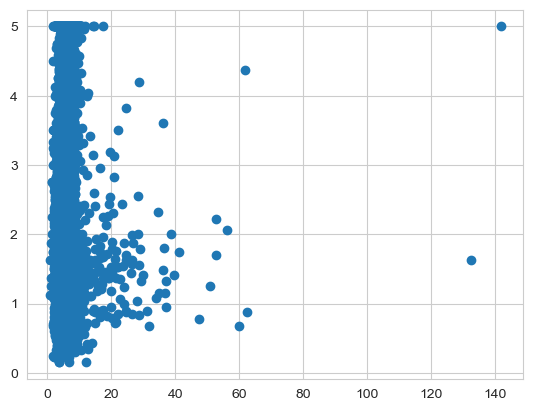

In [17]:
plt.plot(california_df.AveRooms,california_df.Price,'o')

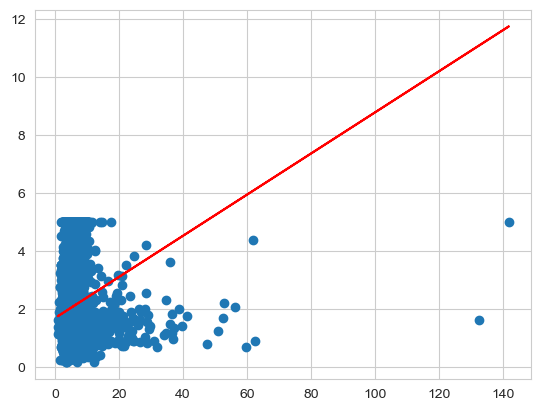

In [18]:
plt.plot(california_df.AveRooms,california_df.Price,'o')
plt.plot(x, m*x + b,'r',label='Best Fit Line')

In [19]:
result = np.linalg.lstsq(A, y, rcond=None)
error_total = result[1]
rmse = np.sqrt(error_total/len(A))
print('The root mean squared error was %.2f' %rmse)

The root mean squared error was 1.14


In [20]:
import sklearn
from sklearn.linear_model import LinearRegression

In [21]:
lreg = LinearRegression()

In [22]:
x_multi = california_df.drop('Price',axis=1)
y_target = california_df.Price

In [23]:
lreg.fit(x_multi,y_target)

LinearRegression()

In [24]:
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)

 The estimated intercept coefficient is -36.94 


In [25]:
print(' The number of coefficients used was %d ' % len(lreg.coef_))

 The number of coefficients used was 8 


In [26]:
coeff_def = DataFrame(california_df.columns)
coeff_def.columns = ['Features']
coeff_def['Coefficient Estimate'] = pd.Series(lreg.coef_)
coeff_def

,Features,Coefficient Estimate
0,MedInc,0.436693
1,HouseAge,0.009436
2,AveRooms,-0.107322
3,AveBedrms,0.645066
4,Population,-0.000004
5,AveOccup,-0.003787
6,Latitude,-0.421314
7,Longitude,-0.434514
8,Price,NaN


Text(0, 0.5, 'Price in $1000s')

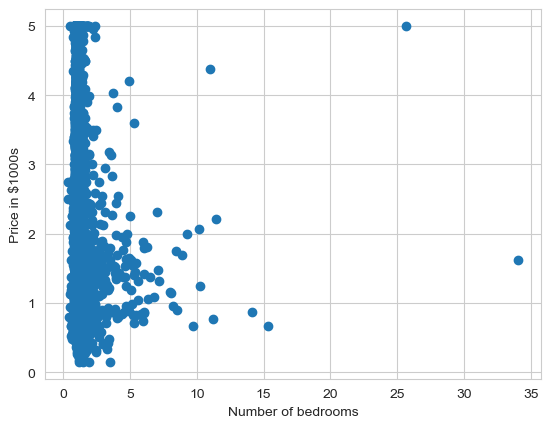

In [27]:
plt.scatter(california.data[:,3],california.target)

plt.xlabel('Number of bedrooms')
plt.ylabel('Price in $1000s')

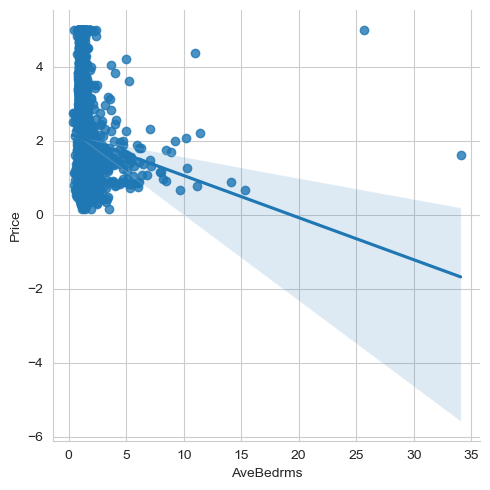

In [28]:
sns.lmplot(data=california_df,x='AveBedrms',y='Price')

In [29]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(A,california_df.Price)

In [30]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(15480, 2) (5160, 2) (15480,) (5160,)


In [31]:
lreg = LinearRegression()
lreg.fit(X_train,Y_train)

LinearRegression()

In [32]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [33]:
print("Fit a model X_train, and calculate MSE with Y_train: %.2f" %np.mean((Y_train - pred_train) ** 2))
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f" %np.mean((Y_test - pred_test) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 1.30
Fit a model X_train, and calculate MSE with X_test and Y_test: 1.30


Text(0.5, 1.0, 'Residual Plots')

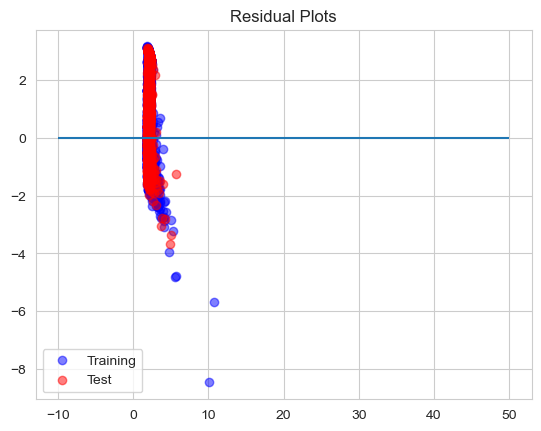

In [34]:
train_plot = plt.scatter(pred_train,(Y_train - pred_train),c='b',alpha=0.5)
test_plot = plt.scatter(pred_test, (Y_test - pred_test),c='r',alpha=0.5)
plt.hlines(y=0,xmin=-10,xmax=50)
plt.legend((train_plot,test_plot),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

<Axes: xlabel='AveRooms', ylabel='Price'>

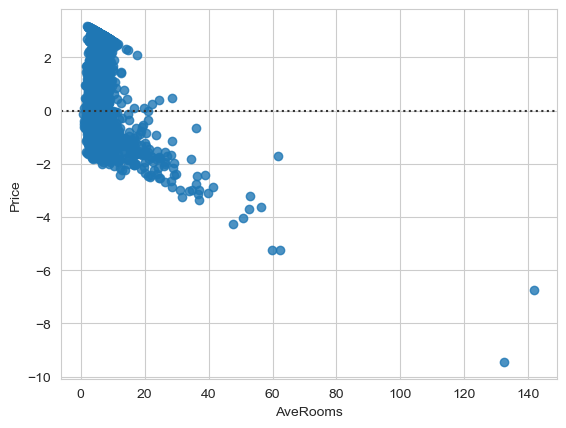

In [35]:
sns.residplot(data=california_df,x='AveRooms',y='Price')

In [36]:
# Set up X as median bedroom values
x_bed = california_df.AveBedrms

In [37]:
A_bed = np.vstack([x_bed, np.ones(len(x_bed))]).T
A_bed

array([[1.02380952, 1.        ],
       [0.97188049, 1.        ],
       [1.07344633, 1.        ],
       ...,
       [1.12009238, 1.        ],
       [1.17191977, 1.        ],
       [1.16226415, 1.        ]])

In [38]:
m_bed, b_bed = np.linalg.lstsq(A_bed, y, rcond=None)[0]
m_bed, b_bed

(-0.11371409577330993, 2.193265592083677)

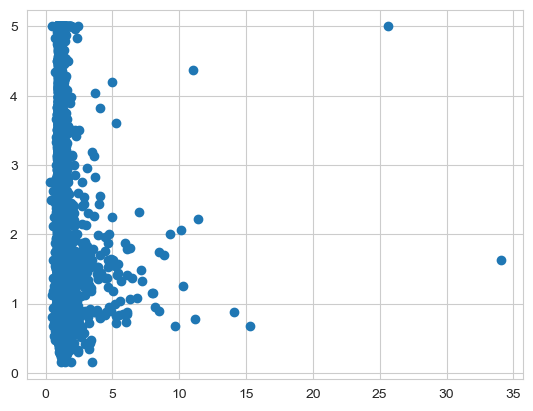

In [39]:
plt.plot(california_df.AveBedrms,california_df.Price,'o')

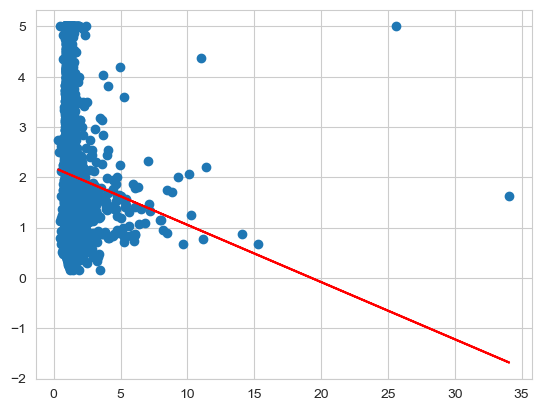

In [40]:
plt.plot(california_df.AveBedrms,california_df.Price,'o')
plt.plot(x_bed, m_bed*x_bed + b_bed,'r',label='Best Fit Line')

In [41]:
result_bed = np.linalg.lstsq(A_bed, y, rcond=None)
error_total_bed = result_bed[1]
rmse_bed = np.sqrt(error_total_bed/len(A_bed))
print('The root mean squared error was %.2f' %rmse_bed)

The root mean squared error was 1.15


In [42]:
X_train_bed, X_test_bed, Y_train_bed, Y_test_bed = sklearn.model_selection.train_test_split(A_bed,california_df.Price)

In [43]:
print(X_train_bed.shape, X_test_bed.shape, Y_train_bed.shape, Y_test_bed.shape)

(15480, 2) (5160, 2) (15480,) (5160,)


In [44]:
lreg = LinearRegression()
lreg.fit(X_train_bed,Y_train_bed)

LinearRegression()

In [45]:
pred_train_bed = lreg.predict(X_train_bed)
pred_test_bed = lreg.predict(X_test_bed)

In [46]:
print("Fit a model X_train_bed, and calculate MSE with Y_train_bed : %.2f" %np.mean((Y_train_bed - pred_train_bed) ** 2))
print("Fit a model X_train_bed, and calculate MSE with X_test_bed and Y_test_bed : %.2f" %np.mean((Y_test_bed - pred_test_bed) ** 2))

Fit a model X_train_bed, and calculate MSE with Y_train_bed : 1.33
Fit a model X_train_bed, and calculate MSE with X_test_bed and Y_test_bed : 1.32


Text(0.5, 1.0, 'Residual Plots')

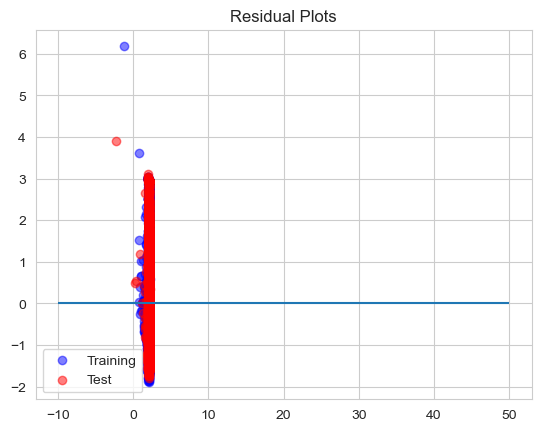

In [47]:
train_plot_bed = plt.scatter(pred_train_bed,(Y_train_bed - pred_train_bed),c='b',alpha=0.5)
test_plot_bed = plt.scatter(pred_test_bed, (Y_test_bed - pred_test_bed),c='r',alpha=0.5)
plt.hlines(y=0,xmin=-10,xmax=50)
plt.legend((train_plot_bed,test_plot_bed),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

<Axes: xlabel='AveBedrms', ylabel='Price'>

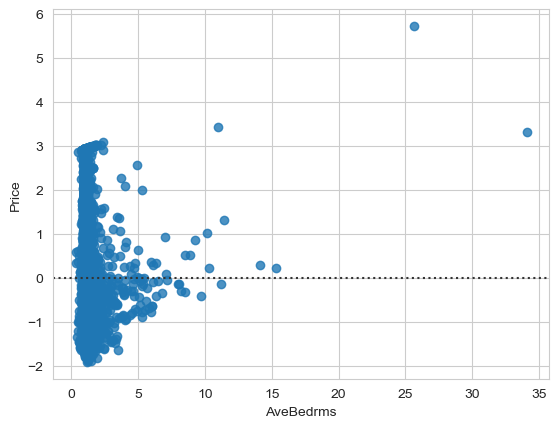

In [48]:
sns.residplot(data=california_df,x='AveBedrms',y='Price')

In [49]:
california.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [50]:
california.target_names

['MedHouseVal']

In [51]:
california.frame

In [52]:
B = np.array( [ [value,1] for value in x ] )
B

array([[6.98412698, 1.        ],
       [6.23813708, 1.        ],
       [8.28813559, 1.        ],
       ...,
       [5.20554273, 1.        ],
       [5.32951289, 1.        ],
       [5.25471698, 1.        ]])

In [53]:
A

array([[6.98412698, 1.        ],
       [6.23813708, 1.        ],
       [8.28813559, 1.        ],
       ...,
       [5.20554273, 1.        ],
       [5.32951289, 1.        ],
       [5.25471698, 1.        ]])